# **5.1 Datenvorbereitung - Beispiel Autopreise**
------------------------------------------------

## a) Notwendige Bibliotheken laden

**LIBRARIES:**

* pandas für Verarbeitung von Tabellen-Daten
* numpy für die Berechnung von Zusammenhängen (z.B. Korrelationen)
* missingno für die Visualisierung von fehlenden Datenpunkten
* matplotlib, seaborn, plotly für die Visualisierung

* (*Facebook Prophet - Zeitreihenvorhersagetool*)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
import plotly.express as px
#from prophet import Prophet
import warnings
warnings.simplefilter("ignore")

## b) Daten einlesen und Überblick über die ersten Zeilen verschaffen

In [3]:
cars = pd.read_csv('CarPrices_miss.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# *Datensatz CarPrices.csv - Metadaten*
---------------------------------------------------

Dieser fiktive Datensatz enthält Informationen zu diversen Automobilmarken, Modellen und deren Eigenschaften. Ziel dieses Übungsdatensatzes besteht in der Untersuchung von Zusammenhängen zwischen den Wagenpreisen (in USD) der Fahrzeuge und deren Eigenschaften.

Quelle: www.kaggle.com (Shalini Goyal, 2019)

# **Attribute:**

* Typ, Kraftstoffart, Ansaugung, Türanzahl, Karosserie, Antrieb, Motorposition, Radstand, Länge, Breite, Höhe, Leergewicht, Motortyp, Zylinderanzahl, Motorgröße, Kraftstoffsystem, Kompressionsverhältnis, PS, maximale Drehzahl, Verbrauch in Miles per gallon - Stadt, Verbrauch in Miles per gallon - Autobahn, Preis

* **Achtung: wir wissen kaum was über die verwendeten Einheiten --> siehe Automaße!**

* Übersicht über Dateistruktur und Datenformate:

In [4]:
cars.shape

(205, 26)

In [6]:
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## c) Fehlende Werte

*   Abfrage mit function isnull
*   **Visualisierung** mit missingno



In [9]:
for col in cars.columns:
    pct_missing = cars[col].isnull().sum()
    print(f'{col} - {pct_missing :}')

car_ID - 0
symboling - 0
CarName - 0
fueltype - 0
aspiration - 0
doornumber - 0
carbody - 0
drivewheel - 0
enginelocation - 44
wheelbase - 0
carlength - 0
carwidth - 0
carheight - 0
curbweight - 0
enginetype - 0
cylindernumber - 0
enginesize - 0
fuelsystem - 0
boreratio - 0
stroke - 0
compressionratio - 0
horsepower - 0
peakrpm - 0
citympg - 0
highwaympg - 0
price - 0


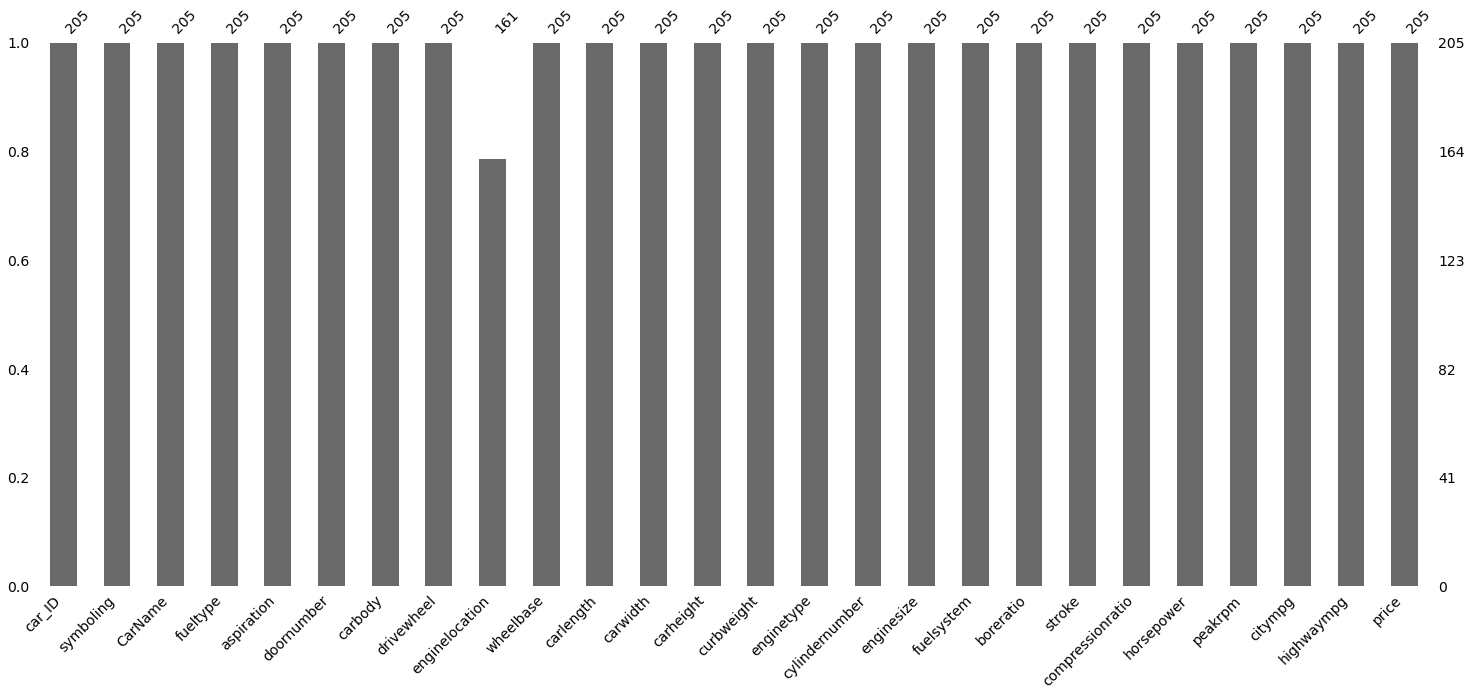

In [10]:
missingno.bar(cars, fontsize = 14)
plt.show()

## d) Duplikate

redundante Datenpunkte finden und entfernen

In [11]:
cars.duplicated().sum()

0

## e) Bereinigen des Datensatzes

* Einträge mit fehlenden Daten entfernen - Achtung! Bei großen Verlusten gezieltes Anpassen der Filter! --> dropna
* Redundante Datensätze löschen --> drop_duplicates

In [12]:
# Welche Spalten sind betroffen? Alternative Lösung
incomplete_columns = list(cars.columns[cars.isnull().any()])
incomplete_columns

['enginelocation']

In [13]:
# Wieviel Daten fehlen - Angabe in Prozent? Alternative Lösung
for col in incomplete_columns:
    percent_missing = cars[cars[col].isnull() == True].shape[0] / cars.shape[0] *100
    print("percent missing for column {}: {}".format(col, percent_missing))

percent missing for column enginelocation: 21.463414634146343


**Löschen mit der Function dropna (pandas):** entwickelt für statistische Analysen, die Probleme erzeugen, wenn nicht numerische Einträge in den Zellen stehen (NaN).
Sehr hilfreiches Tool - bietet viele Optionen zur gezielten Entfernung von fehlenden Dateneinträgen

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html


Probleme entstehen, wenn sehr viele Einträge fehlen - andere Lösungen suchen!

In [14]:
# Entfernen der Zeilen mit fehlenden Daten - fast ein Viertel der Daten fallen raus!
# Es fehlen aber nur Werte in einer Spalte...
cars2 = cars.dropna()
cars2.shape

(161, 26)



Eine andere Option ist das Auffüllen der fehlenden Werte.

**functions fillna, bfill, ffill**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html


In [15]:
cars3 = cars
for col in incomplete_columns:
   cars3[col] = cars[col].fillna('unknown')
cars3.shape

(205, 26)

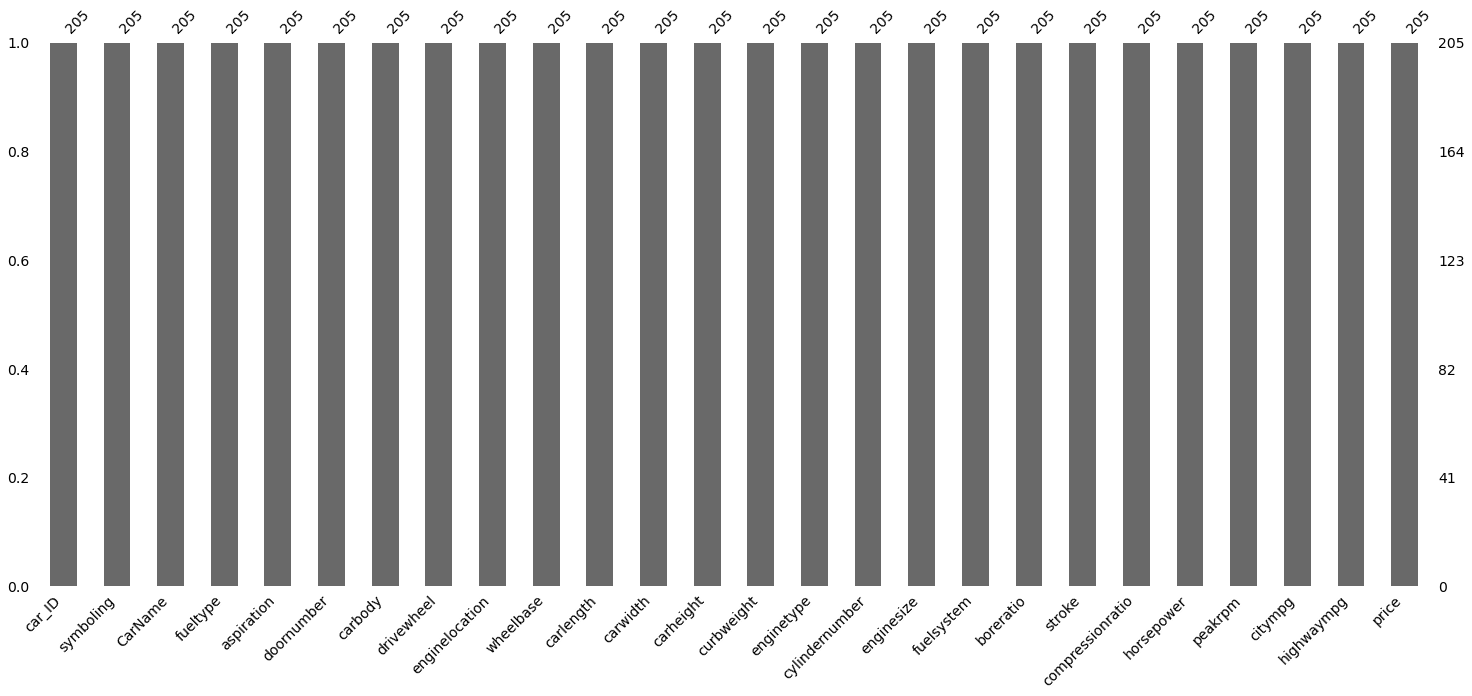

In [16]:
missingno.bar(cars3, fontsize = 14)
plt.show()

## f) Konsolidieren

* Zusammenfassen von Attributen
* Typos entfernen
* Formate vereinheitlichen - z.B. Datum...

In [17]:
# Trennen Marke vom Modell
CompanyName = cars3['CarName'].apply(lambda x : x.split(' ')[0])
cars3.insert(3,"CompanyName",CompanyName)
cars3.drop(['CarName'],axis=1,inplace=True)
cars3.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
cars3.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Das sind offensichtlich einige Typos + ähnliche Namen für die gleiche Marke vergeben --> bereinigen!

In [19]:
cars3.CompanyName = cars3.CompanyName.str.lower()

def replace_name(a,b):
    cars3.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars3.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## g) Erste Übersicht visualisieren

* hilfreich zur Bewertung der Datenqualität
* fließender Übergang zur EDA

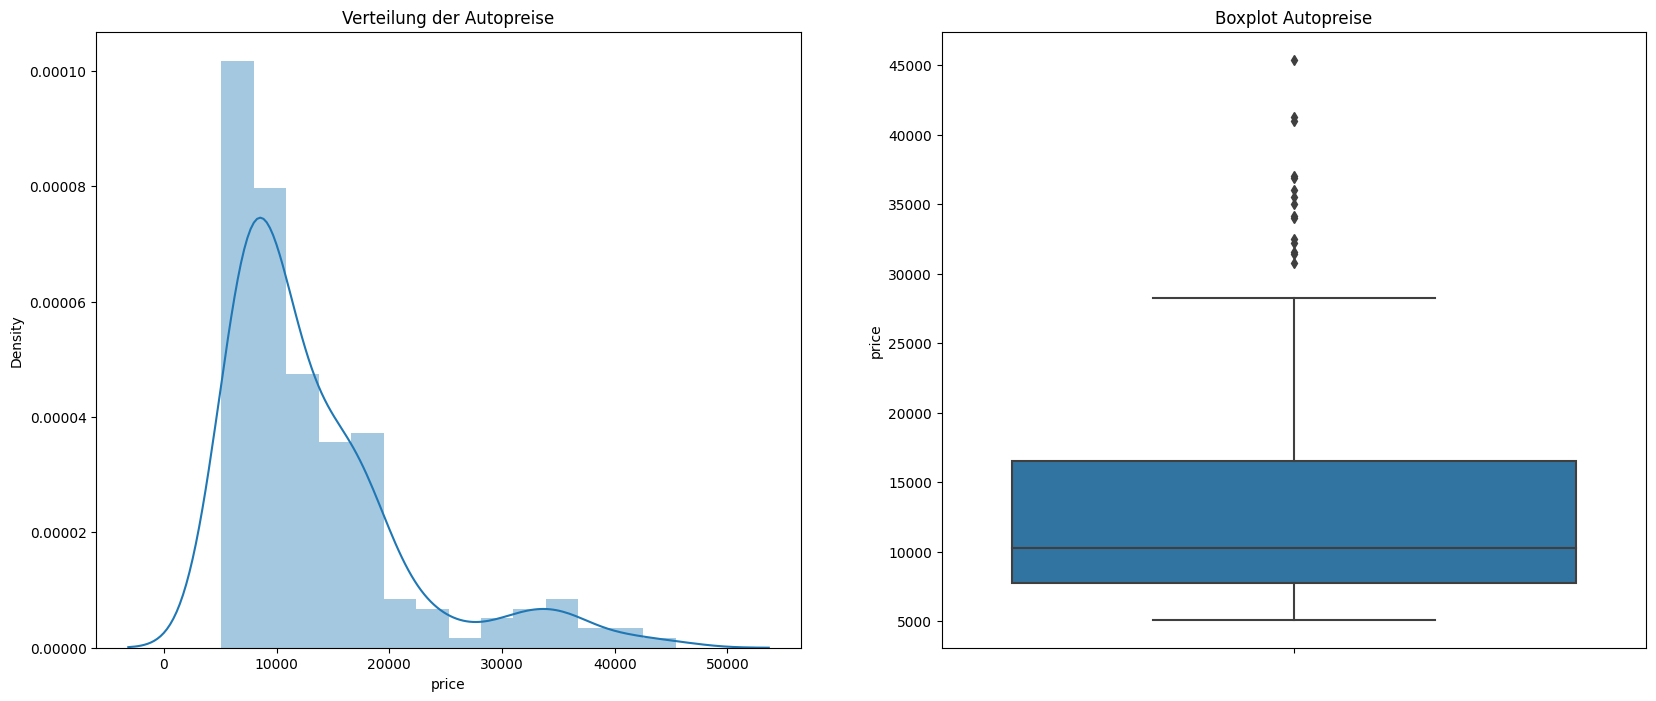

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Verteilung der Autopreise')
sns.distplot(cars3.price)

plt.subplot(1,2,2)
plt.title('Boxplot Autopreise')
sns.boxplot(y=cars3.price)

plt.show()

-----------

# 5.2 EDA

## Univariate Analyse mit Grafiken: 
* Verteilung der Automarken (CarCompanies) --> welche Marken kommen mit welchem Anteil im Datensatz vor (häufigste Marke, seltenste Marke)?
* Wie ist das Verhältnis Diesel vs. Benziner (fueltype)?

## Multivariate Analyse mit Grafiken: 
* Verteilung Automarken nach gemittelten Preisen der Fahrzeuge sortiert (teuerste und billigste Marke)
* Zylinderanzahl (cylindernumber) : Verteilung der Häufigkeit (4- bis 12-Zylinder) und Verteilung in Abhängigkeit vom Preis der Autos
* Streudiagramme zur Untersuchung von funktionalen Abhängigkeiten: z.B. Autolänge vs. Preis; Leergewicht vs. Preis
* Korrelationskoeffizienten berechnen

## Zusammenfassung der Analyse in Stichpunkten

 	💻 Zusammentragen in Google-Slides: https://docs.google.com/presentation/d/1d9sOwFZhRvVv3qi8C9AKUHzHTnJ8yesI0XjOyWVtPTY/edit?usp=sharing



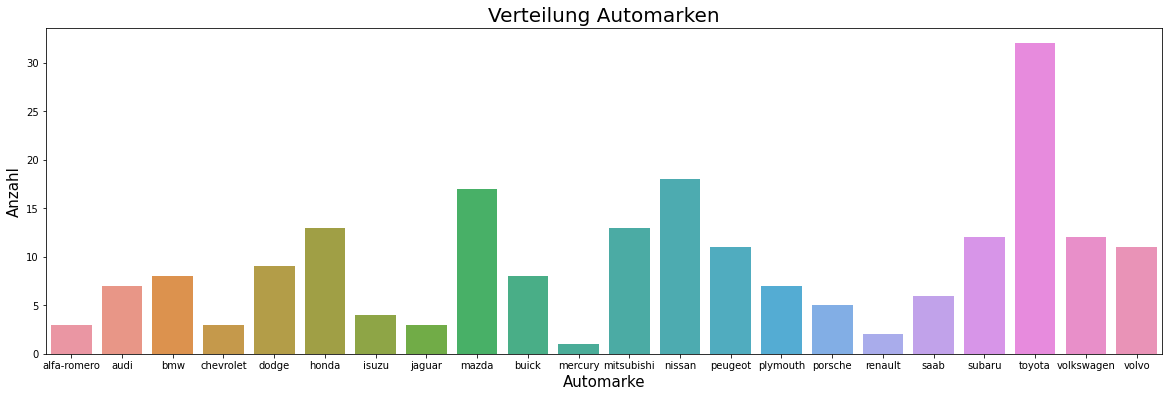

In [20]:
plt.figure(figsize=(20, 6))

sns.countplot(data = cars3, x = 'CompanyName')
plt.title("Verteilung Automarken",fontsize=20)
plt.xlabel("Automarke",fontsize=15)
plt.ylabel("Anzahl",fontsize=15)

plt.show()

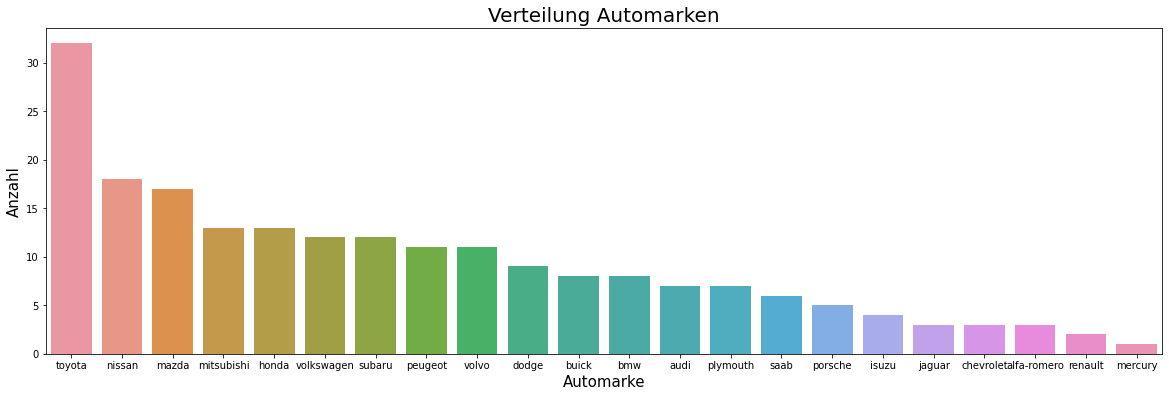

In [21]:
plt.figure(figsize=(20, 6))

sns.countplot(data = cars3, x = 'CompanyName', order = cars3['CompanyName'].value_counts().index)
plt.title("Verteilung Automarken",fontsize=20)
plt.xlabel("Automarke",fontsize=15)
plt.ylabel("Anzahl",fontsize=15)

plt.show()

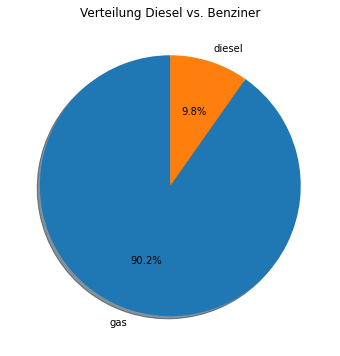

In [22]:
plt.figure(figsize=(6, 6))
num=cars3["fueltype"].value_counts().reset_index()

plt.title('Verteilung Diesel vs. Benziner', fontsize=12)
plt.pie(num.fueltype, labels = num['index'], startangle=90, shadow = True, radius = 1, autopct = '%1.1f%%')
#plt.legend()

plt.show()

<Figure size 1800x432 with 0 Axes>

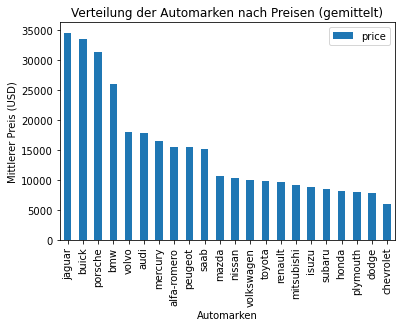

In [23]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars3.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Verteilung der Automarken nach Preisen (gemittelt)', fontsize=12)
plt.xlabel("Automarken",fontsize=10)
plt.ylabel("Mittlerer Preis (USD)",fontsize=10)
plt.show()

In [24]:
# damit im Boxplot darunter die Boxen sortiert nach den MMittelwerten erscheinen, muss eine neue Indizierung eingeführt werden!
mean_salary = cars3.groupby('cylindernumber')['price'].mean().sort_values()
cars3['cylindernumber'] = pd.Categorical(cars3['cylindernumber'], categories=mean_salary.index, ordered=True)

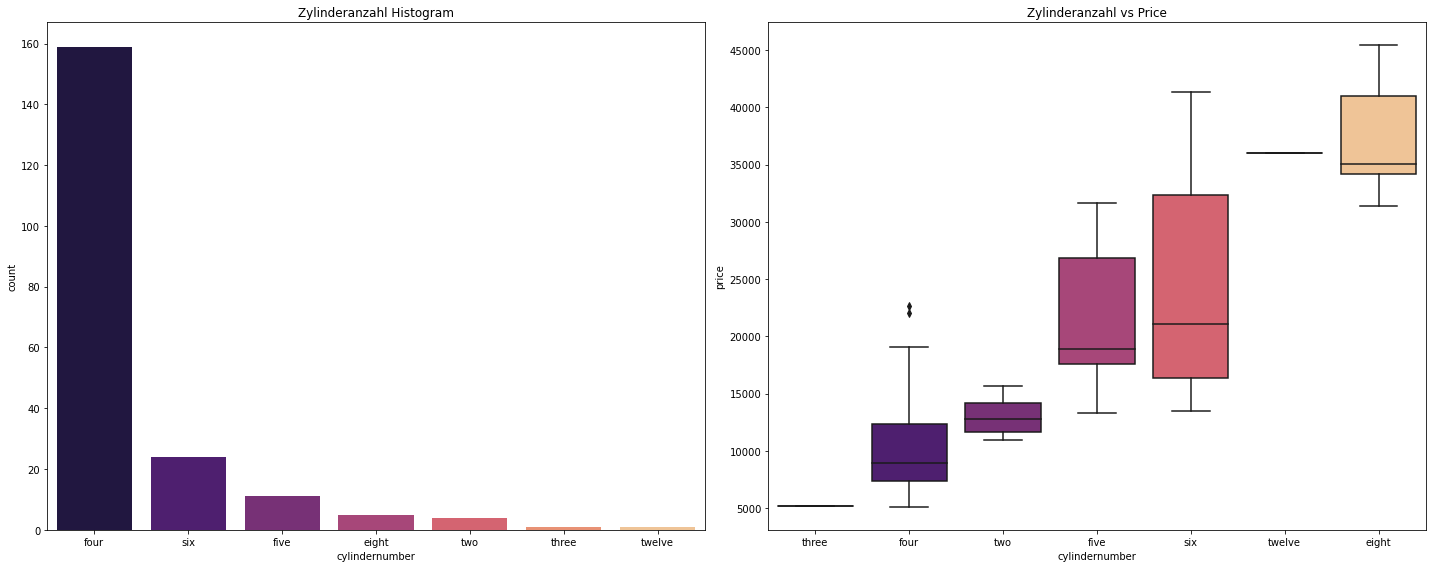

In [25]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Zylinderanzahl Histogram')
sns.countplot(data = cars3, x = 'cylindernumber',palette=("magma"), order = cars3['cylindernumber'].value_counts().index)
plt.subplot(1,2,2)
plt.title('Zylinderanzahl vs Price')
sns.boxplot(x=cars3['cylindernumber'], y=cars3.price, palette=("magma"))

plt.tight_layout()

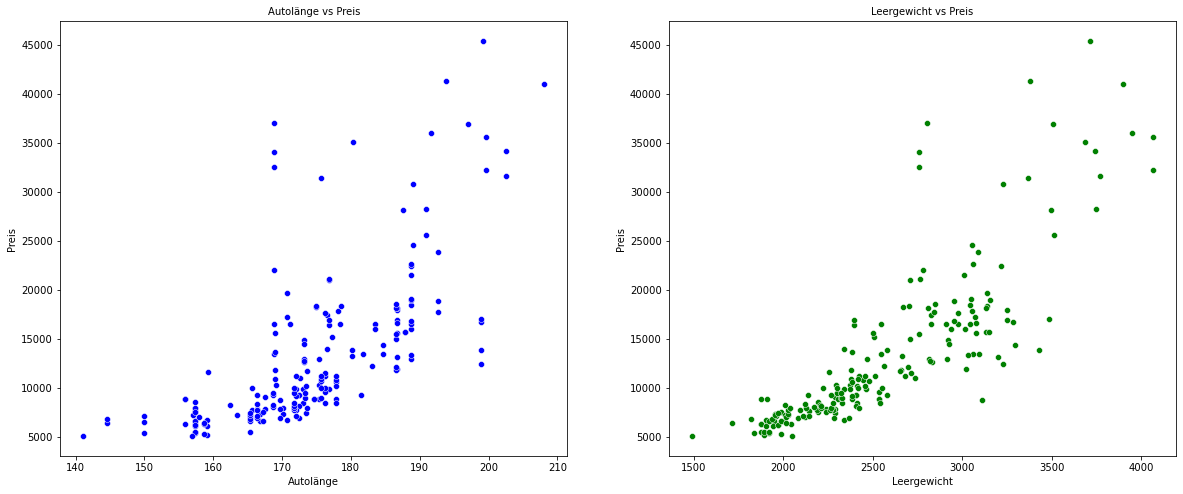

In [26]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(data=cars3, x=cars3['carlength'], y=cars3['price'], marker='o', color='blue')
plt.title('Autolänge vs Preis', fontsize=10)
plt.ylabel('Preis')
plt.xlabel('Autolänge')

plt.subplot(1,2,2)
sns.scatterplot(data=cars3, x=cars3['curbweight'], y=cars3['price'], marker='o', color='green')
plt.title('Leergewicht vs Preis', fontsize=10)
plt.ylabel('Preis')
plt.xlabel('Leergewicht')

plt.show()

In [27]:
correlation_coefficient1 = cars3['carlength'].corr(cars3['price'])
correlation_coefficient2 = cars3['curbweight'].corr(cars3['price'])
print("Correlation Coefficients: Zylinder-Preis R1 = ", correlation_coefficient1, " und Leergewicht-Preis R2 = ",correlation_coefficient2)

Correlation Coefficients: Zylinder-Preis R1 =  0.6829200156779629  und Leergewicht-Preis R2 =  0.8353048793372965


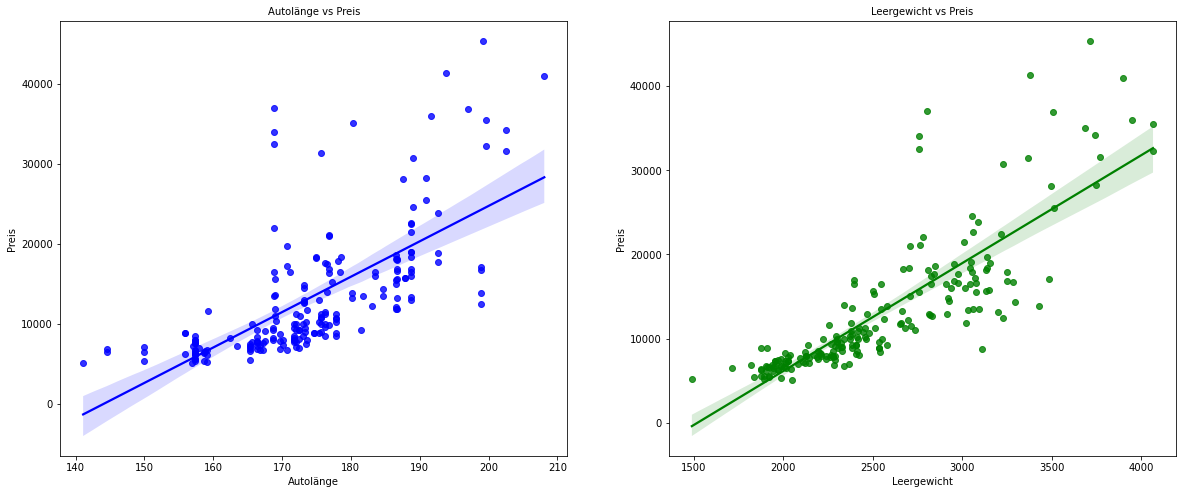

In [28]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.regplot(data=cars3, x=cars3['carlength'], y=cars3['price'], marker='o', color='blue')
plt.title('Autolänge vs Preis', fontsize=10)
plt.ylabel('Preis')
plt.xlabel('Autolänge')

plt.subplot(1,2,2)
sns.regplot(data=cars3, x=cars3['curbweight'], y=cars3['price'], marker='o', color='green')
plt.title('Leergewicht vs Preis', fontsize=10)
plt.ylabel('Preis')
plt.xlabel('Leergewicht')

plt.show()

-------------------------

## Zusammenfassung der Ergebnisse:

* 22 Automarken
* Toyoto meist verkaufte Automarke, gefolgt von Nissan und Mazda (am wenigsten Mercury)
* 90% der Fahrzeuge sind Benziner
* teuerste Automarke ist Jaguar, gefolgt von Buick und Porsche (am billigsten sind Chevis)
* am gängisten sind 4 Zylinder PKWs, sind auch preislich am günstigsten
* je schwerer die Autos, um so teurer sind sie
* auch Autolänge und Preis korrelieren - aber nicht linear
* offensichtlich amerikanische Metrik (Länge, Gewichte)